# In class Recursive Low Pass Filter demonstration
### Author: C. Alex Simpkins, Ph.D.
#### RDPRobotics, LLC | UCSD Summer Session I 2023

This is a recursive low pass filter that we developed in lecture. It is possible to implement in a slightly more efficient way, but it could be considered one of the most 'pythonic' implementations in that it's a one line of code filter! 

You can implement this on nearly any hardware or software system or language. I have personally written this function into systems running C, Basic, Matlab, C++, Python, and even one written in assembly, though I would not recommend that last one. The smallest memory footprint it ran on had less than 1kB memory, and executed at over 1kHz with very little lag or processor load. I have also processed several million datapoints quite quickly this way as well, though one has to be careful about vectorizing things and optimizing the implementation. 

There is math behind determining what the actual cutoff frequency of the filter is and how that associates to the filter coefficient, as well as how it affects what is called the phase lag of the output of the filter relative to the original data. We will spend time on this and some reading/references as well, however at times in a pragmatic sense you may need to simply clean up a signal to view it, and this provides an excellent 'tuning knob' to do that.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def RLow_Pass(a, x, xf):
    xf = (1-a)*x + a*xf
    return xf

In [4]:
data1 = pd.read_csv('https://raw.githubusercontent.com/drsimpkins-teaching/datasets/main/data.csv', header=None)

data1.columns = ['a','b']
len(data1['b'].values)

1001

In [5]:
x=data1['b'].values
xf=0*x
xf[0]=x[0]
for i in range(len(x)):
    xf[i]=RLow_Pass(0.7,x[i],xf[i-1])


    

<AxesSubplot:>

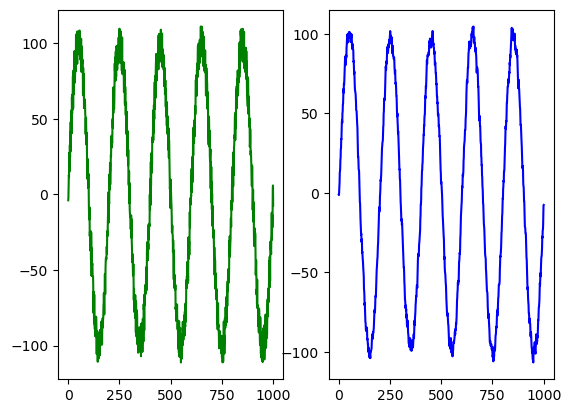

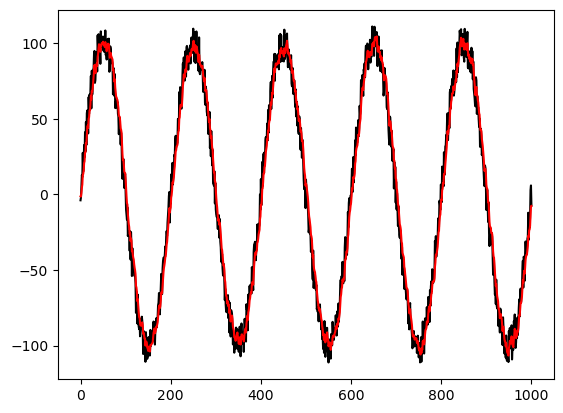

In [12]:
plt.figure(1)

plt.subplot(121)
sns.lineplot(data=x, color='green')

plt.subplot(122)
sns.lineplot(data=xf,color='blue')

plt.figure(2)
sns.lineplot(data=x,color='black')
sns.lineplot(data=xf,color='red')

    

Let's make an error plot to check out the difference between the original signal and the filtered signal.

<AxesSubplot:ylabel='b'>

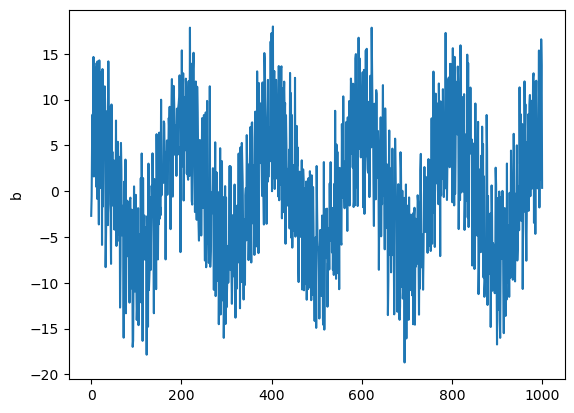

In [62]:
sns.lineplot(data=data1['b']-xf)